In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib. request import urlretrieve

from IPython.display import Image


In [2]:
def download_and_unzip(url, folder):
    print(f"Downloading and extracting assests...", end="")

    urlretrieve(url, folder)

    try:
        with ZipFile(folder) as z:
            z.extractall(os.path.split(folder)[0])

        print("done")

    except Exception as e:
        print("\nINvalid file.",e)

URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

Displaying Images:

In [3]:
#Display 18x18 pixel image
Image(filename="checkerboard_18x18.png")

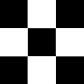

In [4]:
#Display 84x84 pixel image
Image(filename="checkerboard_84x84.jpg")

Reading iamges using openCV

retval = cv2.imread( filename[, flags] )
retval: the image if it's successfully loaded. Else it is None.

1 required input argument.
filename: can be absolute or relative path.

Flags:
cv2.IMREAD_GRAYSCALE or 0
cv2.IMREAD_COLOR or 1
cv2.IMREAD_UNCHANGED or -1

In [5]:
cb_img = cv2.imread("checkerboard_18x18.png",0)
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [6]:
print("Image size (H,W) is:", cb_img.shape)
print("Data type of image is:", cb_img.dtype)

Image size (H,W) is: (18, 18)
Data type of image is: uint8


Using Matplotlib:

In [7]:
plt.imshow(cb_img)

In [8]:
plt.imshow(cb_img, cmap="gray")

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

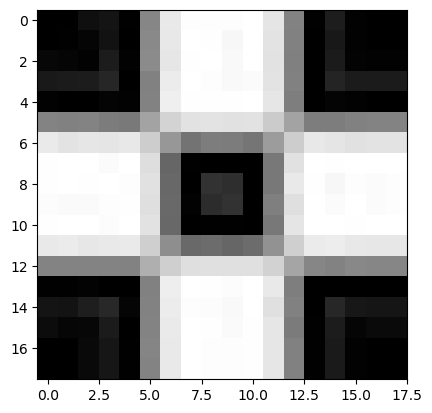

In [9]:
cb_img_fuzzy = cv2.imread("checkerboard_fuzzy_18x18.jpg",0)
print(cb_img_fuzzy)
plt.imshow(cb_img_fuzzy, cmap="gray")
plt.show()

Using Color Images:

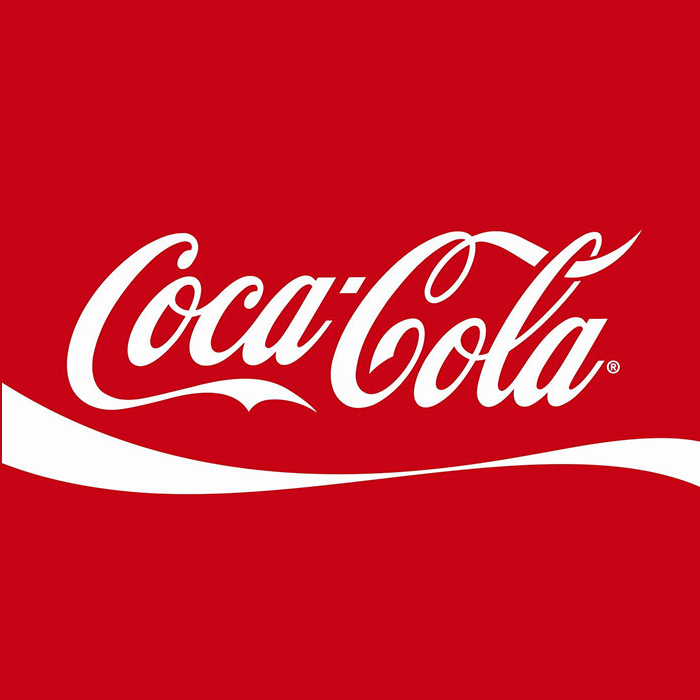

In [10]:
Image("coca-cola-logo.png")

In [11]:
coke_img = cv2.imread("coca-cola-logo.png",1)
print("Image size (H, W, C) is:", coke_img.shape)
print("Data type of image is:", coke_img.dtype)

Image size (H, W, C) is: (700, 700, 3)
Data type of image is: uint8


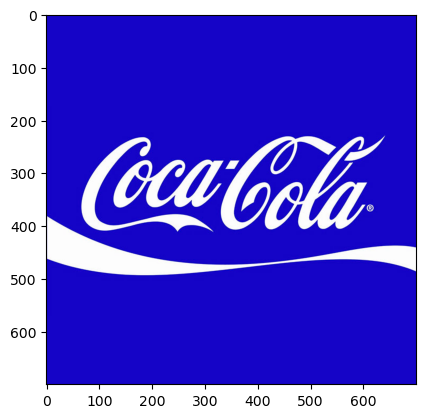

In [12]:
plt.imshow(coke_img)
plt.show()

the color displayed is different from the originial because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format.

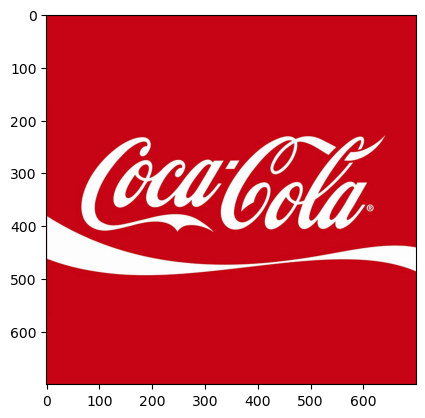

In [13]:
coke_img_channels_reversed = coke_img[:, :, :: -1]
plt.imshow(coke_img_channels_reversed)
plt.show()

Splitting and Merging Color Channels:

cv2.split() - Divides a multi-channel array into serveral single channel arrays

cv2.merge() - merges serveral arrays to make a single multi-channel array. The input matrices needs to be same size.

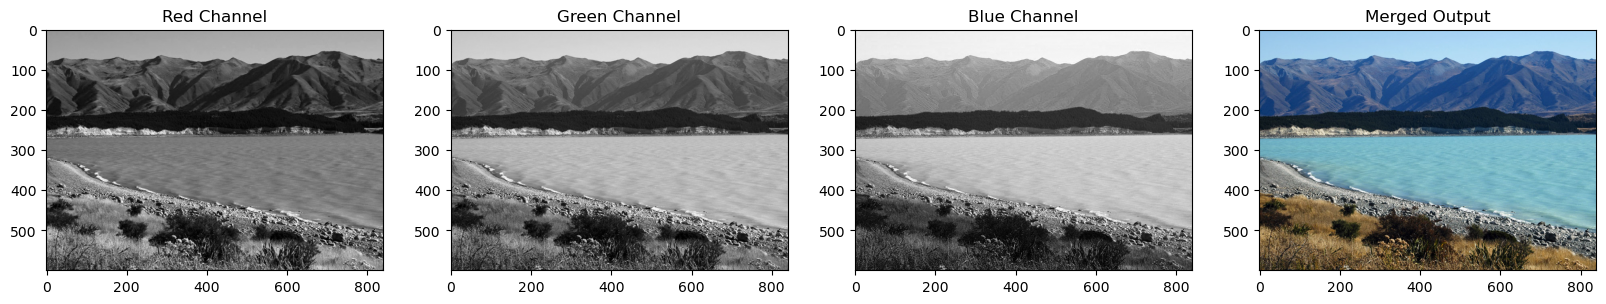

In [14]:
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
b , g , r = cv2.split(img_NZ_bgr)

plt.figure(figsize=[20, 5])
plt.subplot(141); plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142); plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143); plt.imshow(b, cmap="gray");plt.title("Blue Channel")

imgMerged = cv2.merge((b, g, r))

plt.subplot(144); plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output")
plt.show()

Converting to different Color Spaces:

cv2.cvtColor() - coverts an image from one color space to another.

Note:
deafult color format for OpenCV is BGR

dst = cv2.cvtColor( src, code )
dst: output image of the same size and depth as src

src (input image): 8-but unsigned, 16-bit unsigned, or single-precision floating-point

code: color space conversion codes (ColorConversionCodes)

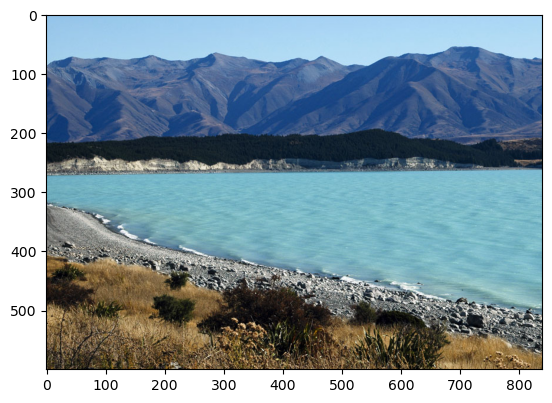

In [15]:
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)
plt.show()

Changing to HSV Color Space:

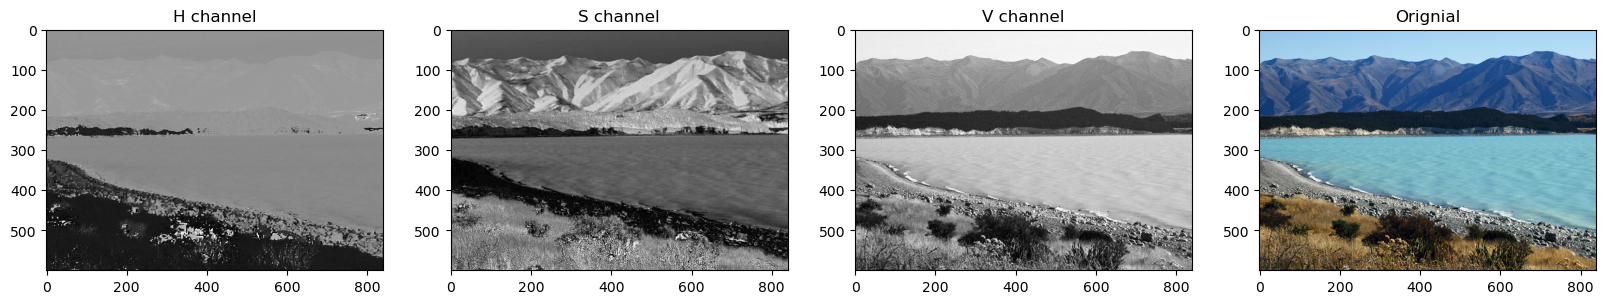

In [16]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)

plt.figure(figsize=[20, 5])
plt.subplot(141); plt.imshow(h, cmap="gray");plt.title("H channel")
plt.subplot(142); plt.imshow(s, cmap="gray");plt.title("S channel")
plt.subplot(143); plt.imshow(v, cmap="gray");plt.title("V channel")
plt.subplot(144); plt.imshow(img_NZ_rgb); plt.title("Orignial")
plt.show()

Modifying individual Channel:

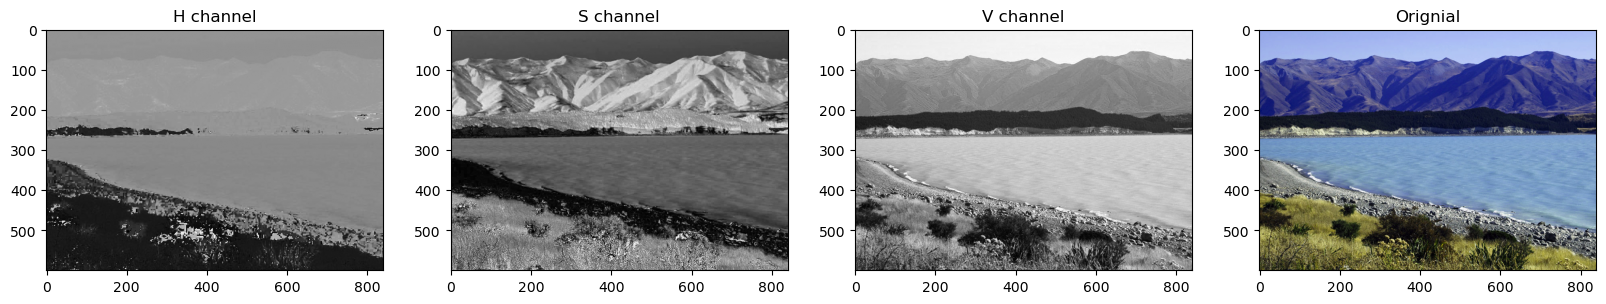

In [17]:
h_new = h + 10
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

plt.figure(figsize=[20, 5])
plt.subplot(141); plt.imshow(h, cmap="gray");plt.title("H channel")
plt.subplot(142); plt.imshow(s, cmap="gray");plt.title("S channel")
plt.subplot(143); plt.imshow(v, cmap="gray");plt.title("V channel")
plt.subplot(144); plt.imshow(img_NZ_rgb); plt.title("Orignial")
plt.show()

Saving Images:

cv2.imwrite() - saving images

cv2.imwrite( filename, img[, params])
filename: can be an absolute or relative path
img: images or images to be saved

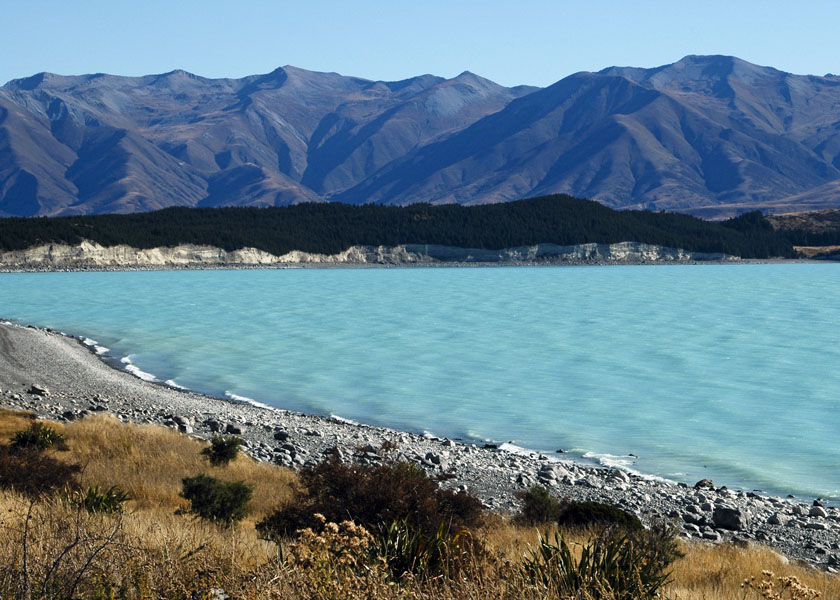

In [18]:
cv2.imwrite("New_Zealand_Lake_SAVED.png", img_NZ_bgr)
Image(filename='New_Zealand_Lake_SAVED.png')

In [19]:
img_NZ_bgr = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is :", img_NZ_bgr.shape)

img_NZ_gry = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W) is :", img_NZ_gry.shape)

img_NZ_bgr shape (H, W, C) is : (600, 840, 3)
img_NZ_gry shape (H, W) is : (600, 840)
